In [ ]:
# #mount google drive
# import os, sys
# from google.colab import drive
# drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.datasets import fetch_california_housing

In [ ]:
# Load the California Housing dataset from scikit-learn
california_housing = fetch_california_housing(as_frame=True)

In [ ]:
print(dir(california_housing))

['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']


In [ ]:
type(california_housing)

sklearn.utils._bunch.Bunch

In [ ]:
# Create a DataFrame from the dataset
california_housing_df = pd.concat([california_housing.data, california_housing.target], axis=1)
california_housing_df.columns = list(california_housing.feature_names) + ['target']

In [ ]:
california_housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
california_housing.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [ ]:
california_housing_df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'target'],
      dtype='object')

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
dtype: int64
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude        target  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mea

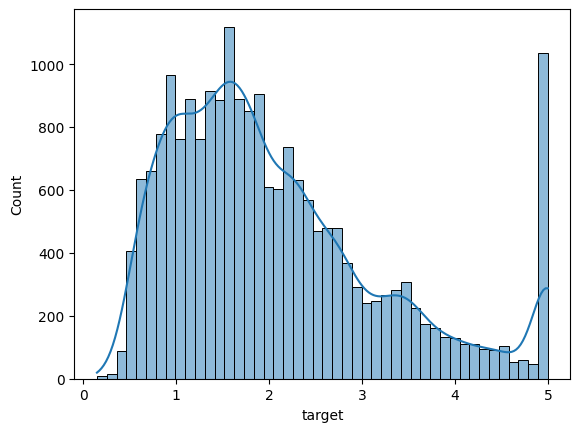

In [ ]:
# Explore the data
print(california_housing_df.isnull().sum())
print(california_housing_df.describe())
sns.histplot(california_housing_df['target'], kde=True)
plt.show()

In [ ]:
# Split the data into training and testing sets
X = california_housing.data
y = california_housing.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Initialize and train the models
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
# Evaluate the models on the test data
lr_pred = lr_model.predict(X_test)
lr_mse = mean_squared_error(y_test, lr_pred)
lr_rmse = np.sqrt(lr_mse)
lr_mae = mean_absolute_error(y_test, lr_pred)

rf_pred = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_pred)

xgb_pred = xgb_model.predict(X_test)
xgb_mse = mean_squared_error(y_test, xgb_pred)

In [ ]:
# Print the mean squared error scores
print("Linear Regression Mean Squared Error: {:.2f}".format(lr_mse))
print("Linear Regression Mean Squared Error: {:.2f}".format(lr_rmse))
print("Linear Regression Mean Squared Error: {:.2f}".format(lr_mae))
print("Random Forest Regression Mean Squared Error: {:.2f}".format(rf_mse))
print("XGBoost Regression Mean Squared Error: {:.2f}".format(xgb_mse))


Linear Regression Mean Squared Error: 0.56
Linear Regression Mean Squared Error: 0.75
Linear Regression Mean Squared Error: 0.53
Random Forest Regression Mean Squared Error: 0.26
XGBoost Regression Mean Squared Error: 0.22


### Predicting the median house value in California based on other factors using linear regression

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load the dataset
data = fetch_california_housing(as_frame=True)
X = data['data']
y = data['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model and fit it to the training data
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the median house value for the test data
y_pred = model.predict(X_test)

# Calculate the mean squared error of the predictions
mse = mean_squared_error(y_test, y_pred)
print('Mean squared error:', mse)


Mean squared error: 0.5558915986952444


#### Using a decision tree to predict whether a given house in California is expensive or cheap based on its location and other factors

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the dataset
data = fetch_california_housing(as_frame=True)
X = data['data']
y = (data['target'] > 2).astype(int)  # 1 if the target is above 2 (i.e., expensive), 0 otherwise

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a decision tree classifier and fit it to the training data
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Predict whether the houses in the test data are expensive or cheap
y_pred = model.predict(X_test)

# Calculate the accuracy of the predictions
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.8396317829457365


#### Predicting the median house value in California based on other factors using neural network

In [ ]:
from sklearn.datasets import fetch_california_housing
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load the dataset
data = fetch_california_housing(as_frame=True)
X = data['data']
y = data['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the neural network architecture
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(16, activation='relu'),
    Dense(1)
])

# Compile the model and specify the loss function and optimizer
model.compile(loss='mse', optimizer='adam')

# Train the model on the training data
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=64)

# Evaluate the model on the testing data
mse = mean_squared_error(y_test, model.predict(X_test))
print('Mean squared error:', mse)

Epoch 1/50
258/258 [==============================] - 2s 3ms/step - loss: 14834.6934 - val_loss: 2.3159
Epoch 2/50
258/258 [==============================] - 1s 2ms/step - loss: 3.0960 - val_loss: 1.9726
Epoch 3/50
258/258 [==============================] - 1s 2ms/step - loss: 2.6635 - val_loss: 1.7676
Epoch 4/50
258/258 [==============================] - 1s 3ms/step - loss: 2.3561 - val_loss: 1.9893
Epoch 5/50
258/258 [==============================] - 1s 3ms/step - loss: 2.1551 - val_loss: 1.6295
Epoch 6/50
258/258 [==============================] - 1s 3ms/step - loss: 1.9650 - val_loss: 1.5862
Epoch 7/50
258/258 [==============================] - 1s 3ms/step - loss: 1.8546 - val_loss: 1.5494
Epoch 8/50
258/258 [==============================] - 1s 2ms/step - loss: 1.7200 - val_loss: 1.5011
Epoch 9/50
258/258 [==============================] - 1s 2ms/step - loss: 1.5944 - val_loss: 1.4064
Epoch 10/50
258/258 [==============================] - 1s 2ms/step - loss: 1.4075 - val_loss: 1.